## Trabalho de Conclusão de Curso - TCC
#### Turma - DSA T212
#### Aluno : Drausio Gomes dos Santos
#### Orientadora: Gabrielle Maria Romeiro Lombardi
#### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
### Resultados do projeto

###### Etapa 6: Buscas no grafo integrado por nome de responsável pelo assinatura do ato e pela unidade organizacional


In [1]:
print("Carregando pacotes necessários")
print("-----------------------------------------------")
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install python-igraph

Carregando pacotes necessários
-----------------------------------------------
Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Defaulting to user inst

In [2]:
print("Importando pacotes")
print("-----------------------------------------------")
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz
import numpy as np

class Main:     
    def show_current_time(self):
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)
        return now

main = Main()
    


Importando pacotes
-----------------------------------------------
igraph :  0.10.1


#### Busca por nome - Visualizando os grafos

IGRAPH DNW- 234140 234081 -- Unidades Organizacionais da Administração Pública - Grafo Integrado 
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), tempo_medio (v), weight (v), data_inicio (e), data_termino (e), label (e), tempo_medio (e), weight (e)
HOSPITAL FEDERAL DE BONSUCESSO|DEPARTAMENTO DE GESTÃO HOSPITALAR NO ESTADO DO RIO DE JANEIRO|SECRETARIA DE ATENÇÃO À SAÚDE|MINISTÉRIO DA SAÚDE |i  2019-01-31 |t 2019-01-31 |q 73 | PAULO ROBERTO COTRIM DE SOUZA-->NAN
HOSPITAL FEDERAL DE BONSUCESSO|DEPARTAMENTO DE ATENÇÃO HOSPITALAR, DOMICILIAR E DE URGÊNCIA|SECRETARIA DE ATENÇÃO ESPECIALIZADA À SAÚDE|MINISTÉRIO DA SAÚDE |i  2019-07-02 |t 2019-07-02 |q 3 | PAULO ROBERTO COTRIM DE SOUZA-->DIRETOR GERAL
HOSPITAL FEDERAL DE BONSUCESSO|DEPARTAMENTO DE ATENÇÃO HOSPITALAR, DOMICILIAR E DE URGÊNCIA|SECRETARIA DE ATENÇÃO ESPECIALIZADA À SAÚDE|MINISTÉRIO DA SAÚDE |i  2019-07-12 |t 2019-07-12 |q 1 | DR. PAULO ROBERTO COTRIM DE SOUZA-->DIRETOR GERAL
[5358, 51152, 54240]
IGRAPH D

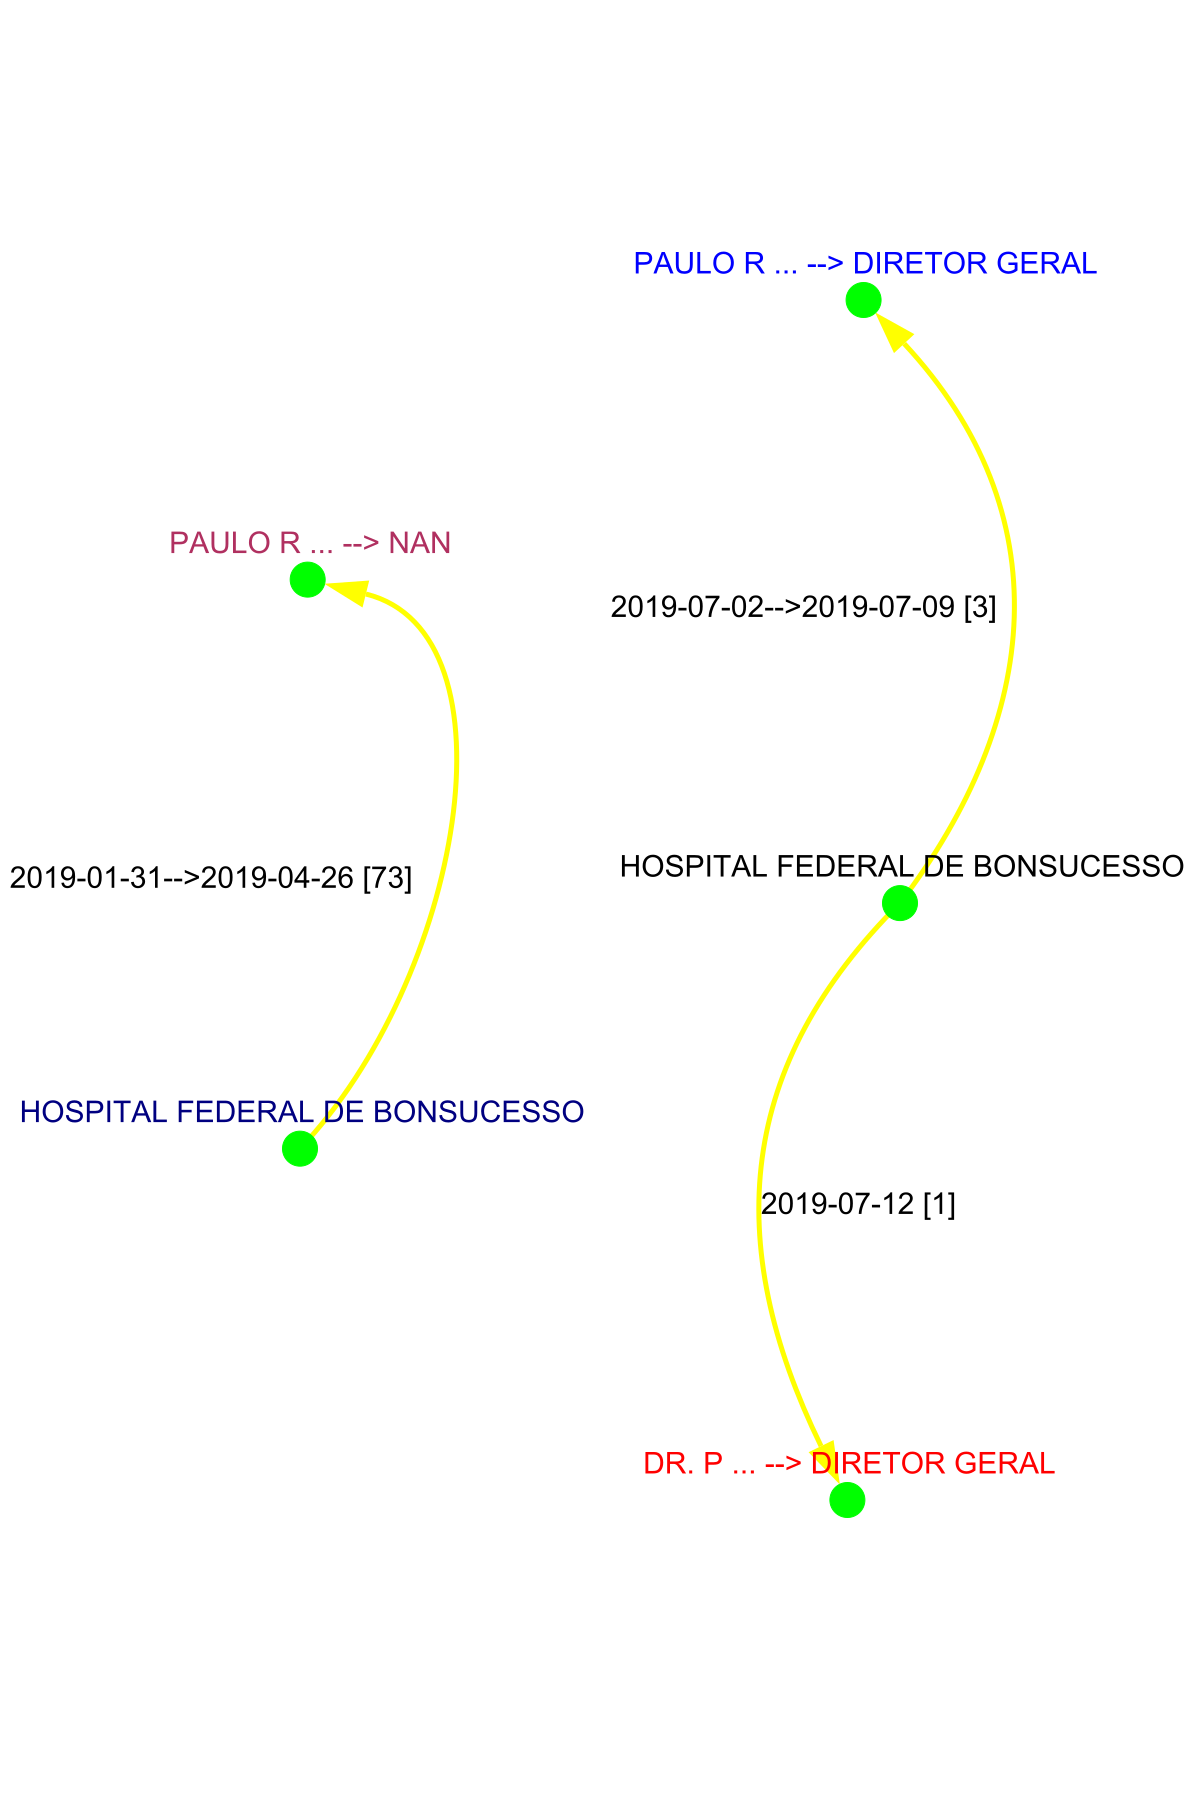

In [9]:
arquivo_grafo = "grafo_2019_2022.pkl"
arquivo_eps = "grafo_parcial_2019_2022.eps"

nome = "PAULO ROBERTO COTRIM DE SOUZA"

def pesquisa_por_nome(ga,nome):
    g = ig.Graph(directed=True)
    edges_indices = []
    for ea in ga.es:
        if nome.lower() in ea.target_vertex["name"].lower() and ea["data_inicio"] is not None:
            print(ea.source_vertex["name"],"|i ",ea["data_inicio"],"|t",ea["data_inicio"],\
                  "|q",ea["weight"],"|" ,ea.target_vertex["name"])
            if ea.index not in edges_indices:
                ea.target_vertex["label"] = \
                ea.target_vertex["label"].split("-->")[0].split()[0] + " " +\
                ea.target_vertex["label"].split("-->")[0].split()[1][0]+ " ... " + "--> " +\
                ea.target_vertex["label"].split("-->")[1]
                edges_indices.append(ea.index)
                   
    print(edges_indices)        
          
    return ga.subgraph_edges(edges_indices)  
   

out_fig_name = arquivo_eps
grafo_integrado = pickle.load(open(arquivo_grafo, "rb"))

visual_style = {}
visual_style["bbox"] = (1200,1800)
visual_style["margin"] = 300
visual_style["vertex_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 35
visual_style["edge_width"] = 5
visual_style["edge_arrow_size"] = 3
visual_style["vertex_label_size"] = 30
visual_style["edge_label_size"] = 30
visual_style["edge_curved"] = True

visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
print(grafo_integrado.summary())

grafo_filtrado = pesquisa_por_nome(grafo_integrado,nome)
print(grafo_filtrado.summary())
plot(grafo_filtrado, out_fig_name, **visual_style)

###### Busca por unidade organizacional

IGRAPH DNW- 234140 234081 -- Unidades Organizacionais da Administração Pública - Grafo Integrado 
+ attr: name (g), data_inicio (v), data_termino (v), label (v), name (v), tempo_medio (v), weight (v), data_inicio (e), data_termino (e), label (e), tempo_medio (e), weight (e)
COORDENADORIA DE RECURSOS E ASSESSORAMENTO|DIRETORIA COLEGIADA|AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR|MINISTÉRIO DA SAÚDE |i  2019-01-14 |t 2019-01-14 |q 16 | LEANDRO FONSECA-->DIRETOR PRESIDENTE SUBSTITUTO
COORDENADORIA DE RECURSOS E ASSESSORAMENTO|DIRETORIA COLEGIADA|AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR|MINISTÉRIO DA SAÚDE |i  2019-01-14 |t 2019-01-14 |q 9 | LEANDRO FONSECA DA SILVA-->DIRETOR PRESIDENTE SUBSTITUTO
COORDENADORIA DE RECURSOS E ASSESSORAMENTO|DIRETORIA COLEGIADA|AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR|MINISTÉRIO DA SAÚDE |i  2019-07-01 |t 2019-07-01 |q 31 | LEANDRO FONSECA-->DIRETOR PRESIDENTE
COORDENADORIA DE RECURSOS E ASSESSORAMENTO|DIRETORIA COLEGIADA|AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR|MINISTÉRI

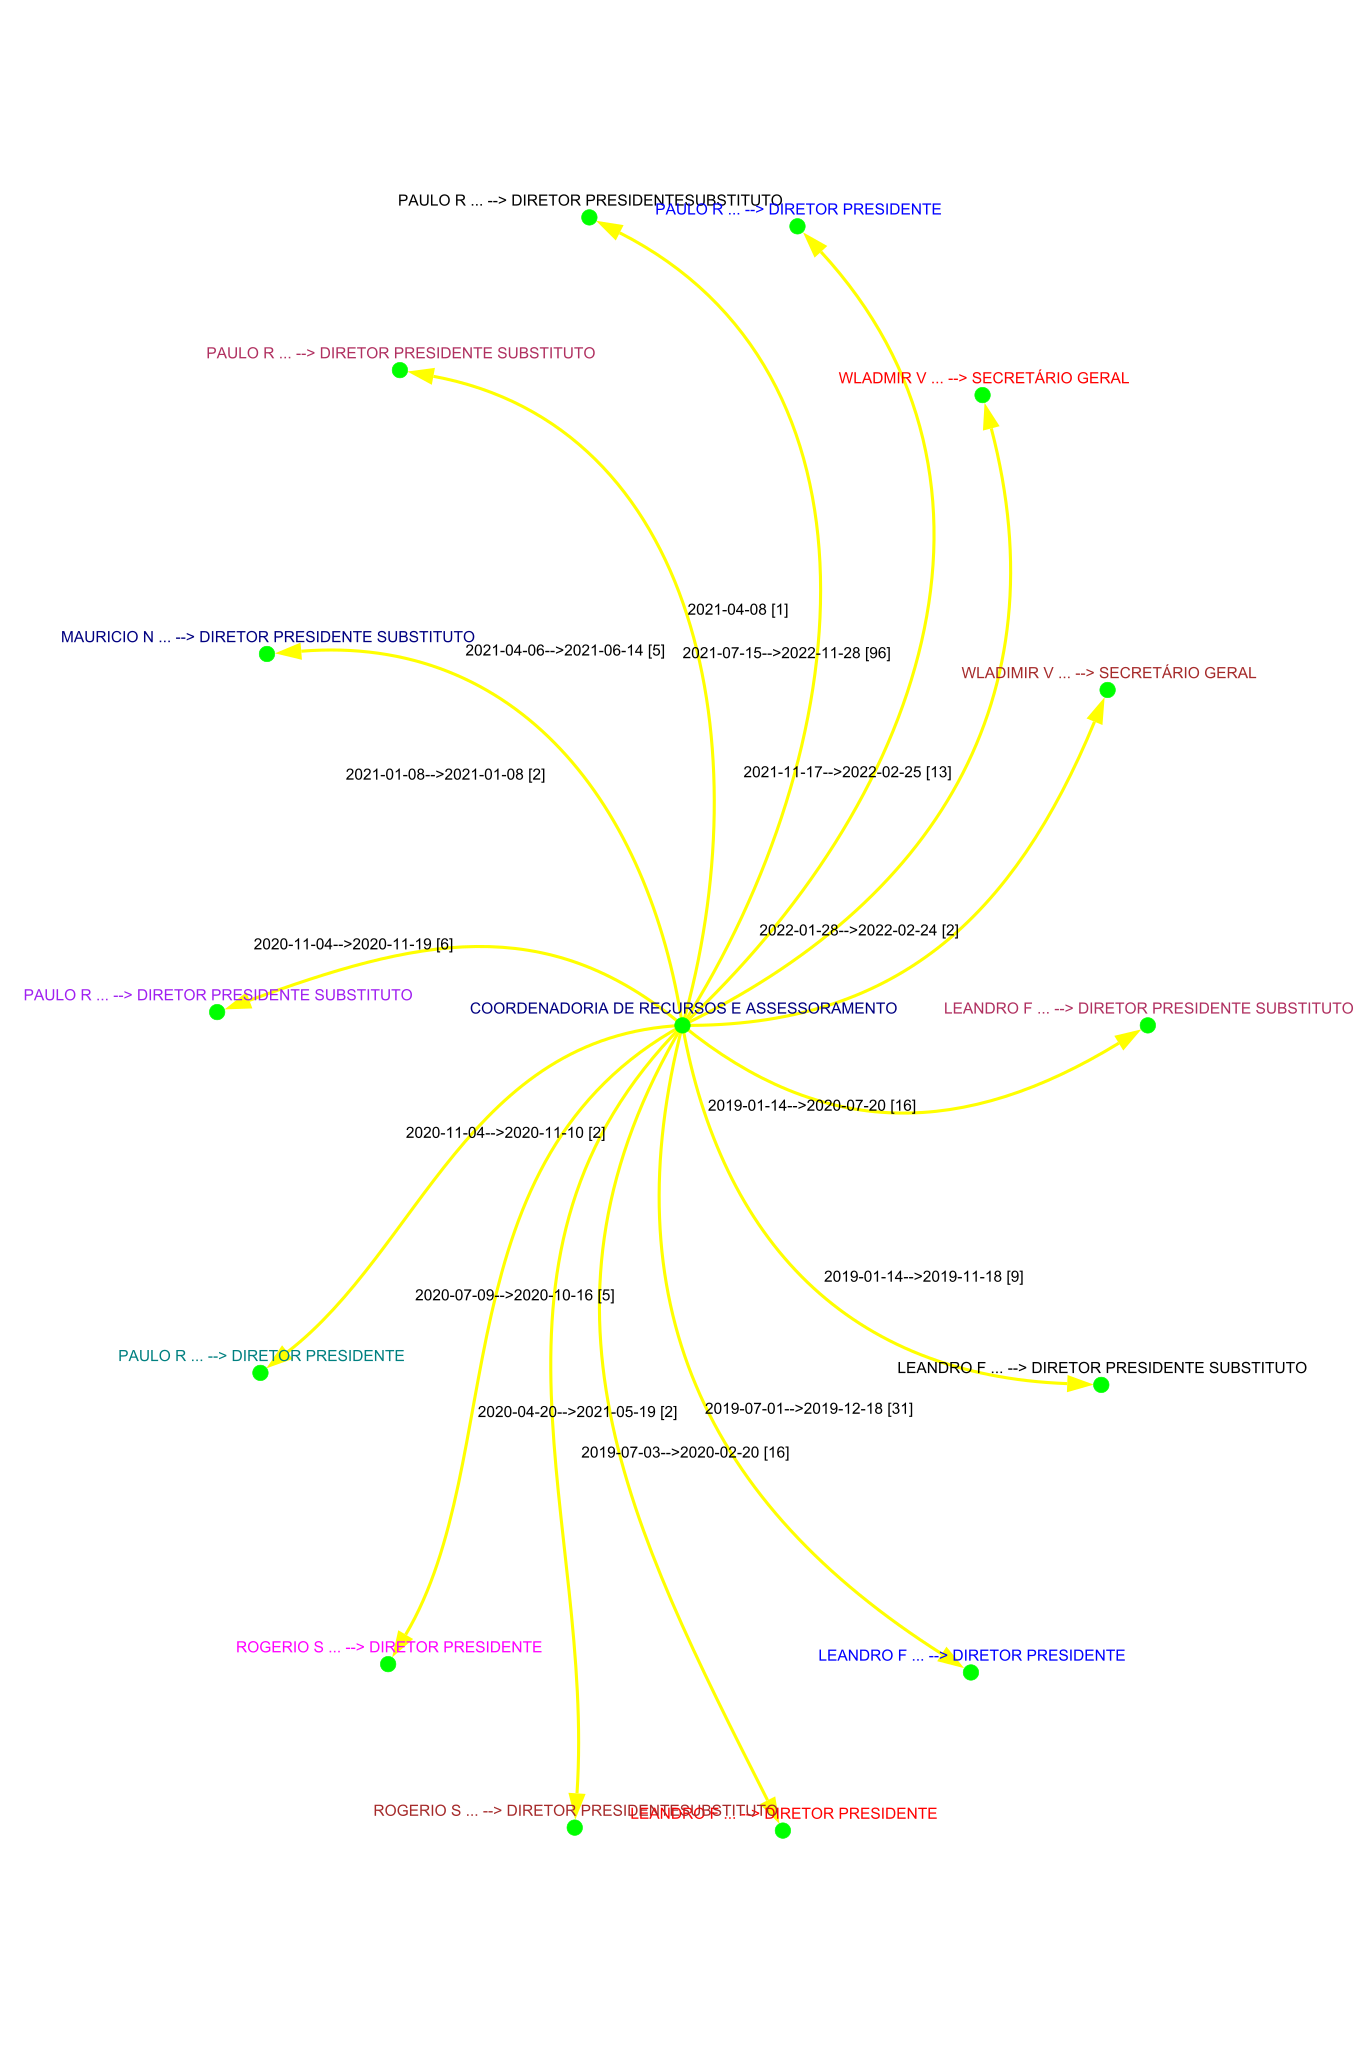

In [19]:

nome = "Coordenadoria de Recursos e Assessoramento"
arquivo_grafo = "grafo_2019_2022.pkl"
arquivo_eps = "grafo_parcial_u_2019_2022.eps"

def pesquisa_por_unidade(ga,nome):
    g = ig.Graph(directed=True)
    edges_indices = []
    for ea in ga.es:
        if nome.lower() in ea.source_vertex["name"].lower():
            print(ea.source_vertex["name"],"|i ",ea["data_inicio"],"|t",ea["data_inicio"],"|q",ea["weight"],"|" ,ea.target_vertex["name"])
            if ea.index not in edges_indices:
                ea.target_vertex["label"] = \
                ea.target_vertex["label"].split("-->")[0].split()[0] + " " +\
                ea.target_vertex["label"].split("-->")[0].split()[1][0]+ " ... " + "--> " +\
                ea.target_vertex["label"].split("-->")[1]
                edges_indices.append(ea.index)
                   
    print(edges_indices)        
          
    return ga.subgraph_edges(edges_indices)  
   
out_fig_name = arquivo_eps
grafo_integrado = pickle.load(open(arquivo_grafo, "rb"))






visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']

visual_style = {}
visual_style["bbox"] = (2200,3300)
visual_style["margin"] = 350
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = 1.5
visual_style["edge_color"] = 'yellow'
#visual_style["edge_label_size"] = 14
visual_style["edge_label_size"] = 25
#visual_style["edge_label_dist"] = 0.1
#visual_style["edge_label_angle"] = 0.1
visual_style["vertex_size"] = 25
#visual_style["vertex_size"] = 20
#visual_style["vertex_label_size"] = 16
visual_style["edge_width"] = 5
visual_style["edge_arrow_size"] = 3
visual_style["vertex_label_size"] = 25

visual_style["edge_curved"] = True
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']

print(grafo_integrado.summary())


grafo_filtrado = pesquisa_por_unidade(grafo_integrado,nome)

visual_style["layout"] = grafo_filtrado.layout_reingold_tilford_circular()
plot(grafo_filtrado, out_fig_name, **visual_style)